## Fraud Detection Data Analysis Project

#### Author: Jaykumar Tamkhane
#### Date: March 2025
#### Objective: Analyze transactional data to identify patterns of fraud and flagged transactions and gain insights for fraud prevention.

In [1]:
# importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### data understanding

In [19]:
# Loading data

In [6]:
# import csv file using pandas liberary
df = pd.read_csv(r"C:\Users\jayta\Downloads\Fraud.csv")

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.shape

(6362620, 11)

In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [18]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [24]:
# Data Cleaning

In [23]:
df.duplicated().sum()

0

In [25]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [26]:
# EDA

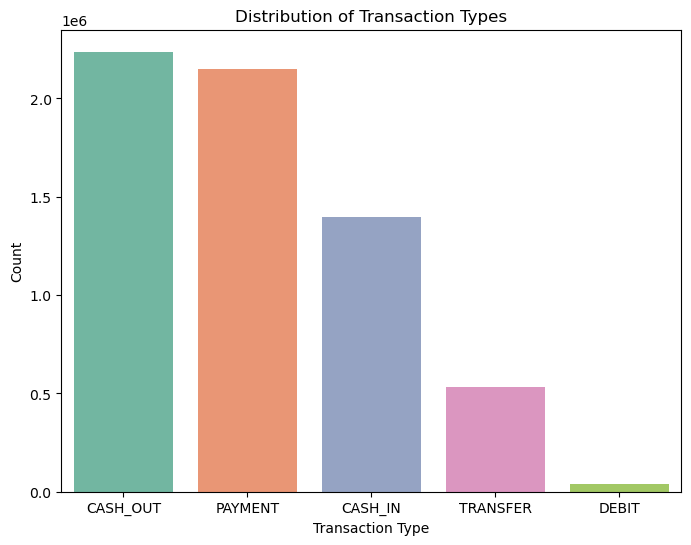

In [32]:
# Distribution of Transaction Types
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='Set2')
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

Most Transaction are done in cashout and payments

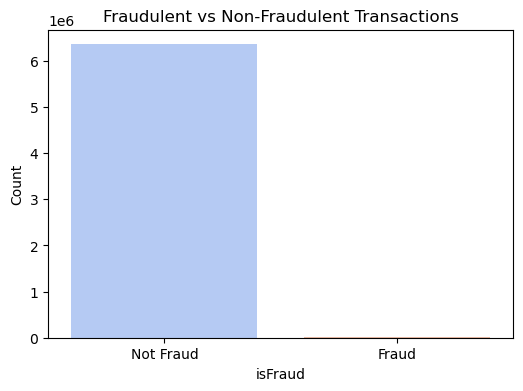

Percentage of Fraudulent Transactions: 0.13%


In [33]:
# Fraud vs Non-Fraud Transactions
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='isFraud', palette='coolwarm')
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.ylabel("Count")
plt.show()

# Fraud percentage
fraud_percent = df['isFraud'].mean() * 100
print(f"Percentage of Fraudulent Transactions: {fraud_percent:.2f}%")

Fraudulent Transactions are Rare - The percentage of fraudulent transactions is extremely low (typically less than 1%), indicating that fraud is rare but significant.

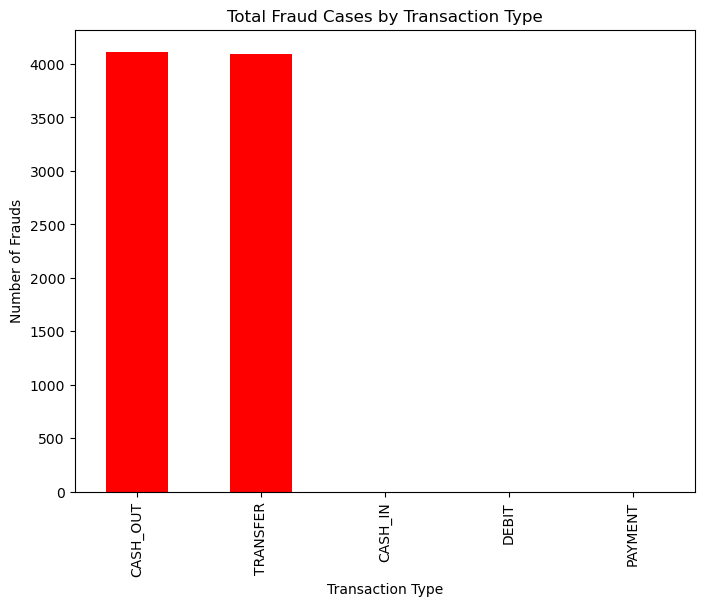

In [34]:
# Fraud by Transaction Type
fraud_by_type = df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
fraud_by_type.plot(kind='bar', color='red')
plt.title("Total Fraud Cases by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Frauds")
plt.show()

Fraud Occurs Only in Specific Transaction Types
* Fraudulent activity is observed only in TRANSFER and CASH_OUT transactions, aligning with typical fraud patterns (fund transfers followed by cash withdrawals).

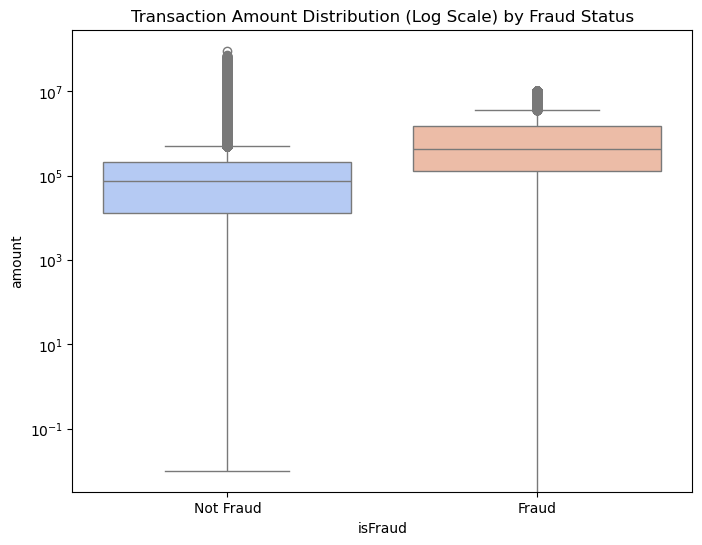

In [35]:
# Amount Distribution in Fraudulent Transactions
plt.figure(figsize=(8,6))
sns.boxplot(x='isFraud', y='amount', data=df, palette='coolwarm')
plt.yscale('log')
plt.title("Transaction Amount Distribution (Log Scale) by Fraud Status")
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()

High-Value Transactions are a Major Risk Factor
* Fraudulent transactions tend to involve larger amounts, often in the higher range.
* The flagged fraud rule for transactions over 200,000 appears to catch some but not all fraudulent attempts.

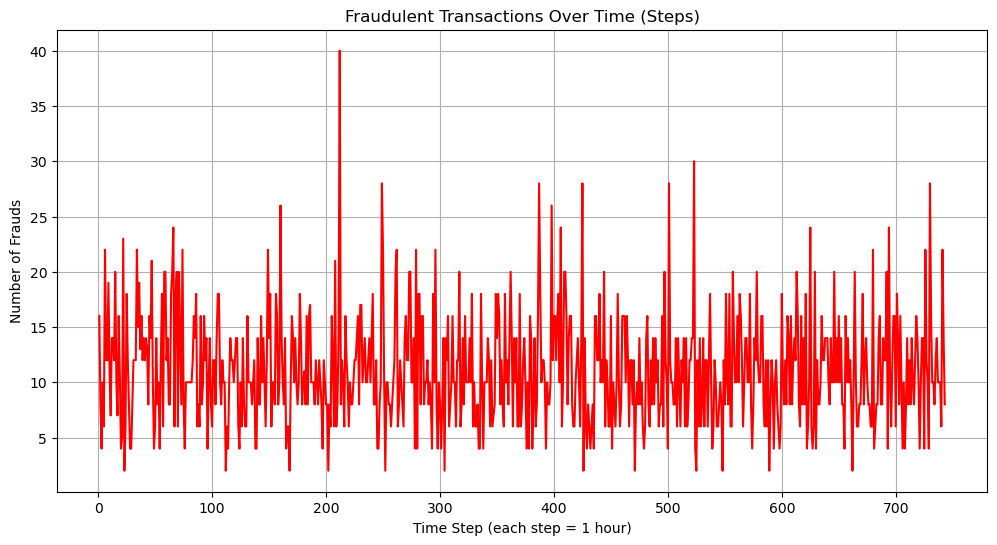

In [36]:
# Time Analysis of Fraud (Step vs Fraud)
fraud_over_time = df[df['isFraud']==1].groupby('step').size()
plt.figure(figsize=(12,6))
fraud_over_time.plot(kind='line', color='red')
plt.title("Fraudulent Transactions Over Time (Steps)")
plt.xlabel("Time Step (each step = 1 hour)")
plt.ylabel("Number of Frauds")
plt.grid()
plt.show()

Fraudulent Activities Spike at Certain Times
* A noticeable spike in fraud activity at certain time steps (hours), suggesting targeted attack windows or automated fraud attempts.

Number of Flagged Fraud Attempts: 16


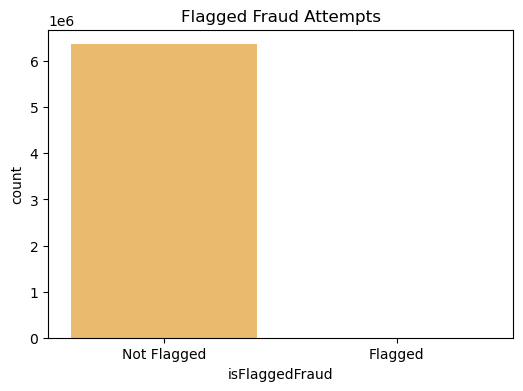

In [37]:
# Flagged Fraud Analysis
flagged_fraud_count = df['isFlaggedFraud'].sum()
print(f"Number of Flagged Fraud Attempts: {flagged_fraud_count}")

plt.figure(figsize=(6,4))
sns.countplot(x='isFlaggedFraud', data=df, palette='YlOrRd')
plt.title("Flagged Fraud Attempts")
plt.xticks([0,1], ['Not Flagged', 'Flagged'])
plt.show()

Flagged Fraud Attempts are Very Low
* Despite the presence of large transactions, only a few are flagged. This indicates that the current rule-based flagging mechanism might miss some suspicious activity.

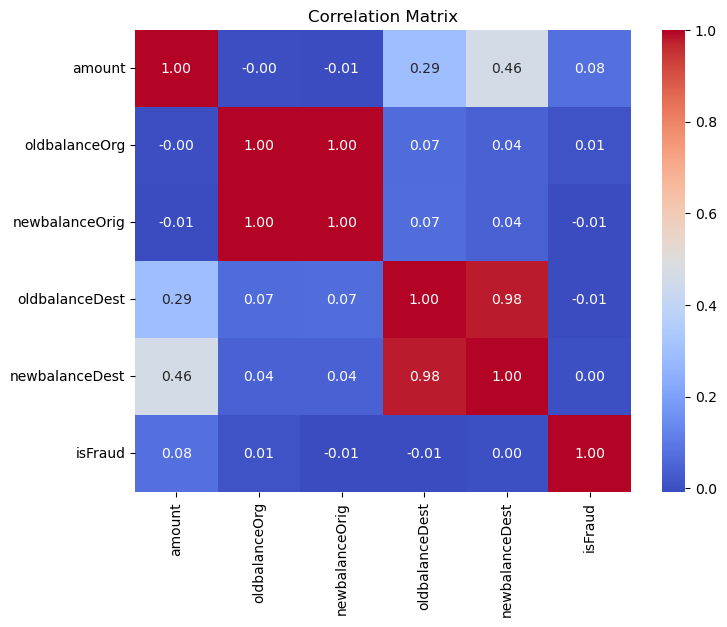

In [38]:
# Correlation Analysis
plt.figure(figsize=(8,6))
corr = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Strong Correlation Observed
* High correlation between amount, oldbalanceOrg, and newbalanceOrig shows that fraudulent transactions often completely deplete the sender’s account balance.

# Conclusion & Recommendations

* The dataset shows that fraudulent transactions are rare but predominantly occur through TRANSFER and CASH_OUT transaction types.

* Fraudulent activities are generally associated with high-value transactions, often draining the sender’s balance to zero.

* While a rule-based system flags some large transactions (above 200,000), it is not sufficient to catch all fraudulent attempts.

* Certain time windows (steps) show spikes in fraud occurrences, indicating possibly automated or coordinated fraud attempts.